<center>
<img src="https://raw.githubusercontent.com/PinkWink/DataScience/master/img/title.jpg" width="200" height="200"><br>
</center>

# 8장 - 자연어 처리 시작하기 


자연어 처리는 데이터 분석이 인기를 끌고 있는 요즘 이론적 배경에 대한 이해는 부족하더라도 자연어 처리 모듈의 일부 기능을 사용하는 빈도가 조금씩 많아지고 있다. 자연어 처리 전문가가 아니더라도 웹 데이터를 다루다 보면 정형화된 데이터에서 단순 텍스트 분석등의 역할에 대한 니즈가 있다.

## 8-1 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

한글 자연어 처리를 파이썬으로 하는 것을 도와주는 모둘은 Lucy Park 이라는 분이 개발한 KoNLPy 모듈이 필수이다.

## 8-2 한글 자연어 처리 기초

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

먼저 꼬꼬마 모듈을 사용할 수 있게 한다.

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

마침표가 없어도 위와 같이 두 개의 문장으로 구분한다.

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

명사(nouns) 분석도 수행한다.

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

형태소(pos) 분석도 수행한다. 한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근하기 어렵다. 그래서 최소한의 의미 단위인 형태소로 언어를 분석하는 것이 일반적이다.

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

이번엔 한나눔을 사용해 보자.

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

한나눔 명사 분석은 꼬꼬마와는 약간 다른 결과를 가져온다.

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

한나눔의 형태소 분석 결과이다.

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

이번엔 트위터 분석이다.

In [9]:
from konlpy.tag import Twitter
t = Twitter()

/home/jaeyoon89/.local/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

역시 미세한 차이를 가지고 있다.

## 8-3 워드 클라우드

워드 클라우드는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알리는데 도움을 준다. 파이썬에서 사용할 수 있는 워드 클라우드도 몇 가지 있지만 여기서는 그중 하나를 살펴 보겠다.

In [42]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

먼저 필요한 모듈을 임포트 한다. 그리고 이상한 나라의 엘리스 영문 버전을 다운 받고 읽어오자. 그리고 앨리스 그림도 저장한다.
- 데이터 출처 : [파이썬으로 데이터 주무르기 github](https://github.com/PinkWink/DataScience)

In [44]:
text = open('/home/jaeyoon89/DataScience/data/09. alice.txt').read()
alice_mask = np.array(Image.open('/home/jaeyoon89/DataScience/data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

앨리스 소설에는 said 라는 단어가 많이 등장하는 것 같다. 이 단어는 카운트에서 제거하도록 하고 있다.

In [45]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    re('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')
        
%matplotlib inline

Unknown system... sorry~~~~


한글 폰트를 설정해 준다.

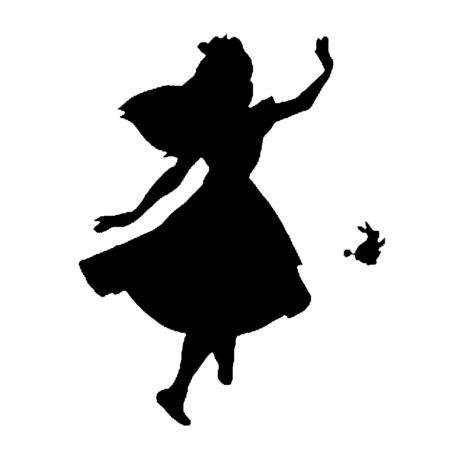

In [46]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

이제 문서 자체에서 단어를 카운트하는 기능을 워드 클라우드가 제공하니 그것을 사용해 최빈 단어를 찾아보자.

In [47]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

위는 그 결과이다. Alice가 가장 많이 등장했다.

In [ ]:
plt.figure(figsize)